In [1]:
import os
import numpy as np
import pandas as pd
import pickle

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_PATH = "/Users/jeremy/Google Drive/datasets/fashion-dataset/"
print(os.listdir(DATASET_PATH))

['embeddings.tsv', '.DS_Store', 'images.csv', 'images', 'resnet50-embeddings-full.pkl', 'styles_preprocessed.csv', 'styles', 'styles.csv', '.ipynb_checkpoints', 'embeddings.csv', 'resnet50-embeddings.pkl']


In [3]:
df = pd.read_csv(DATASET_PATH + "styles_preprocessed.csv", error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
5   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   
6  30805    Men        Apparel     Topwear       Shirts      Green  Summer   
7  26960  Women        Apparel     Topwear       Shirts     Purple  Summer   
8  29114    Men    Accessories       Socks        Socks  Navy Blue  Summer   
9  30039    Men    Accessories     Watches      Watches      Black  Winter   

   year   usage                             productDisplayName      image  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016  Casual                       Titan Women Silver Watch  59263.jpg  
3  2011  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012  Casual                          Puma Men Grey T-shirt  53759.jpg  
5  2011  Casual           Inkfruit Mens Chain Reaction T-shirt   1855.jpg  
6  2012  Ethnic               Fabindia Men Striped Green Shirt  30805.jpg  
7  2012  Casual                  Jealous 21 Women Purple Shirt  26960.jpg  
8  2012  Casual                       Puma Men Pack of 3 Socks  29114.jpg  
9  2016  Casual                         Skagen Men Black Watch  30039.jpg

In [4]:
df_embs = pickle.load(open(DATASET_PATH + "resnet50-embeddings-full.pkl", "rb"))

In [5]:
# Filter only embeddings with master category 'Apparel' and save indices to filter for them later
df_filtered = df.loc[df.masterCategory == 'Apparel']
df_filtered_idx = df_filtered.index.values.tolist()
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.masterCategory.unique(), df_filtered.shape, len(df_filtered_idx)

(array(['Apparel'], dtype=object), (21393, 11), 21393)

In [6]:
embs_filtered = []
for i, row in df_embs.iterrows():
    if i in  df_filtered_idx:
        embs_filtered.append(row)
df_embs_filtered = pd.DataFrame(embs_filtered)
df_embs_filtered = df_embs_filtered.reset_index(drop=True)
df_embs_filtered

0          1         2          3         4         5     \
0      5.661311   2.366158  0.000000   3.255738  0.845207  2.673839   
1      5.790412   9.593652  0.000000   9.431687  0.287238  0.259950   
2      5.882204   1.958622  0.000000  12.519884  0.000000  0.000000   
3      0.245961  17.383436  0.493822   3.374461  2.567365  0.000000   
4      0.028540  18.567101  0.000000   0.757250  1.504954  0.000000   
...         ...        ...       ...        ...       ...       ...   
21388  0.000000  35.020271  7.460171   1.012842  1.366380  2.258118   
21389  2.841607  15.895623  1.662815   2.716725  0.000000  0.727688   
21390  3.243481  16.985628  1.560327   2.596826  0.545848  0.000000   
21391  3.075987   6.170718  0.000000   0.242754  6.728174  0.000000   
21392  1.785497  17.258791  1.072108   2.708099  0.259384  0.000000   

            6         7         8         9     ...       2038      2039  \
0       8.780884  6.280785  0.787186  1.587661  ...   2.463607  0.000000   
1      17.028755  3.037456  0.136339  0.000000  ...   1.670569  0.013894   
2       9.383584  3.781623  0.000000  1.490620  ...  17.825481  0.000000   
3       6.482548  5.862635  0.000000  3.164864  ...   4.464021  0.447082   
4       1.982043  2.963786  1.072763  4.539298  ...   3.247076  4.273134   
...          ...       ...       ...       ...  ...        ...       ...   
21388   1.922700  1.341036  1.293422  0.000000  ...   4.813864  2.418916   
21389   1.496747  0.472215  0.905088  3.890155  ...   6.330880  2.010111   
21390   9.023268  0.919529  1.380090  3.811848  ...  13.571547  2.010174   
21391   3.616792  1.160508  0.088385  1.244293  ...   4.731680  1.630670   
21392   4.596123  4.987752  3.391690  0.304968  ...   5.246232  2.968144   

            2040       2041      2042      2043      2044      2045      2046  \
0       1.825991  20.485271  3.902871  0.000000  8.225970  1.313863  0.000000   
1      10.338679   4.784732  0.189142  0.000000  7.739138  0.372693  0.000000   
2       3.592513   2.042306  0.000000  0.000000  6.656784  1.457313  1.694215   
3       1.448132  12.884141  0.000000  0.397487  5.028076  1.939697  0.000000   
4       3.088639  16.997049  0.000000  0.000000  2.258092  1.595798  0.000000   
...          ...        ...       ...       ...       ...       ...       ...   
21388   1.957278   0.703634  6.915268  0.523176  4.877475  0.000000  0.000000   
21389   3.669139  13.017206  0.000000  0.749803  4.271129  1.611024  0.000000   
21390   1.121704  18.124388  1.862831  0.000000  1.212624  2.394026  3.093368   
21391   0.743359  15.961621  9.004664  0.551970  1.509514  0.000000  1.935909   
21392   1.390609  18.857891  0.000000  0.000000  3.451751  5.321138  0.000000   

            2047  
0      10.820534  
1       8.903797  
2       1.403330  
3      11.485396  
4       7.674057  
...          ...  
21388  14.361758  
21389   9.624297  
21390  25.842484  
21391  13.389180  
21392  13.287771  

[21393 rows x 2048 columns]

In [7]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(df_embs_filtered)
df_embs_pca = pd.DataFrame(pca_result)
df_embs_pca

0          1          2          3          4          5   \
0      -64.358322   2.009619   4.514811  48.358051 -19.128208   5.341860   
1      -52.113655 -68.620743 -57.570938 -31.831533  53.722252 -23.362497   
2      -22.425560 -59.431065 -64.441544 -27.177917  47.944721 -31.331598   
3      -54.588402 -30.280909  21.072212  -0.946983 -21.051596  -9.433716   
4      -28.993313 -14.921948  54.522724 -20.936163 -14.654252  -7.483523   
...           ...        ...        ...        ...        ...        ...   
21388  106.352806 -50.901711  48.033333  14.035456   4.876494  -4.716317   
21389  -37.274265 -15.107395  56.033382 -37.821751   7.631822 -12.318067   
21390  -33.474815  26.566467  21.142494 -23.724077  21.569012 -24.361298   
21391    1.716131  63.075352   7.019021  -0.876212  25.028656  17.429094   
21392  -39.879749 -19.104366  51.208794 -14.958025 -22.935560 -26.445288   

              6          7          8          9   ...         40         41  \
0      48.396999 -27.092903 -30.360033  19.001438  ...  -9.071087   8.215377   
1      -2.748737 -17.557005 -21.903578   6.951228  ...  -3.665813   2.832396   
2      -1.548556   8.081211  -4.351093 -14.550855  ...   0.197475   8.835472   
3     -18.622112   3.578437 -16.154678  19.666740  ...  10.448174  -1.485339   
4      17.664501  19.237646 -10.021850  -5.285010  ...   2.954145   0.582661   
...          ...        ...        ...        ...  ...        ...        ...   
21388 -13.125369  -2.849052  -0.469340 -25.319588  ...   5.732883 -13.649914   
21389  25.639029 -17.738396  14.464334  -2.579109  ...  14.822649   7.866271   
21390 -19.553108 -66.617638  18.289864 -10.338527  ...  22.624067   4.932591   
21391  22.952528 -33.428253  -2.201528   8.034469  ...   2.077172   6.128677   
21392  -0.652860   1.629130   1.893374 -17.587292  ...   1.947067   4.157611   

              42        43         44         45         46         47  \
0     -13.170728 -2.535536  -9.295861   5.030573   2.138444  -2.418288   
1       7.861125  9.173599   8.191520 -11.013424  -3.653335  -3.191070   
2      -3.613437  4.114087   7.720882   3.028560 -20.638550 -11.122557   
3       6.962009  2.170184  -1.749378   9.808295   0.631214   5.084732   
4     -14.019236 -9.116981  14.697897   2.616764 -11.361177 -11.606824   
...          ...       ...        ...        ...        ...        ...   
21388  13.142207  1.902974   4.306599   1.016215   3.348193   1.379208   
21389  10.351299  1.115799   5.050133   0.583831  25.584921  -1.630004   
21390  -0.640320 -1.793400   4.342110 -13.798885   9.268993 -16.489540   
21391 -15.692570  2.518255  30.358299 -12.965788  -1.196374   2.393317   
21392  -3.967992  0.192537  -0.107248   4.663589  -7.745187  -6.154983   

              48         49  
0       4.943937  -2.996478  
1       4.239873  -2.259551  
2      14.252125  10.947790  
3       0.982665   2.000519  
4      -3.363455  -0.481988  
...          ...        ...  
21388   8.151499  -7.478302  
21389  -9.122427   1.703494  
21390  -3.364994 -15.492753  
21391   8.612288 -19.127014  
21392  -1.858697 -14.849270  

[21393 rows x 50 columns]

In [8]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_embs_pca)
df_filtered['x'] = tsne_results[:, 0]
df_filtered['y'] = tsne_results[:, 1]
df_filtered.head()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21393 samples in 0.001s...
[t-SNE] Computed neighbors for 21393 samples in 12.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21393
[t-SNE] Computed conditional probabilities for sample 2000 / 21393
[t-SNE] Computed conditional probabilities for sample 3000 / 21393
[t-SNE] Computed conditional probabilities for sample 4000 / 21393
[t-SNE] Computed conditional probabilities for sample 5000 / 21393
[t-SNE] Computed conditional probabilities for sample 6000 / 21393
[t-SNE] Computed conditional probabilities for sample 7000 / 21393
[t-SNE] Computed conditional probabilities for sample 8000 / 21393
[t-SNE] Computed conditional probabilities for sample 9000 / 21393
[t-SNE] Computed conditional probabilities for sample 10000 / 21393
[t-SNE] Computed conditional probabilities for sample 11000 / 21393
[t-SNE] Computed conditional probabilities for sample 12000 / 21393
[t-SNE] Computed conditional probabilities for s

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
3  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
4   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   

   year   usage                             productDisplayName      image  \
0  2011  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg   
1  2012  Casual             Peter England Men Party Blue Jeans  39386.jpg   
2  2011  Casual  Manchester United Men Solid Black Track Pants  21379.jpg   
3  2012  Casual                          Puma Men Grey T-shirt  53759.jpg   
4  2011  Casual           Inkfruit Mens Chain Reaction T-shirt   1855.jpg   

          x         y  
0 -6.496084  2.630079  
1  7.621794 -2.372315  
2  6.004099 -2.100288  
3 -0.238025  3.512378  
4  2.386110  5.298223

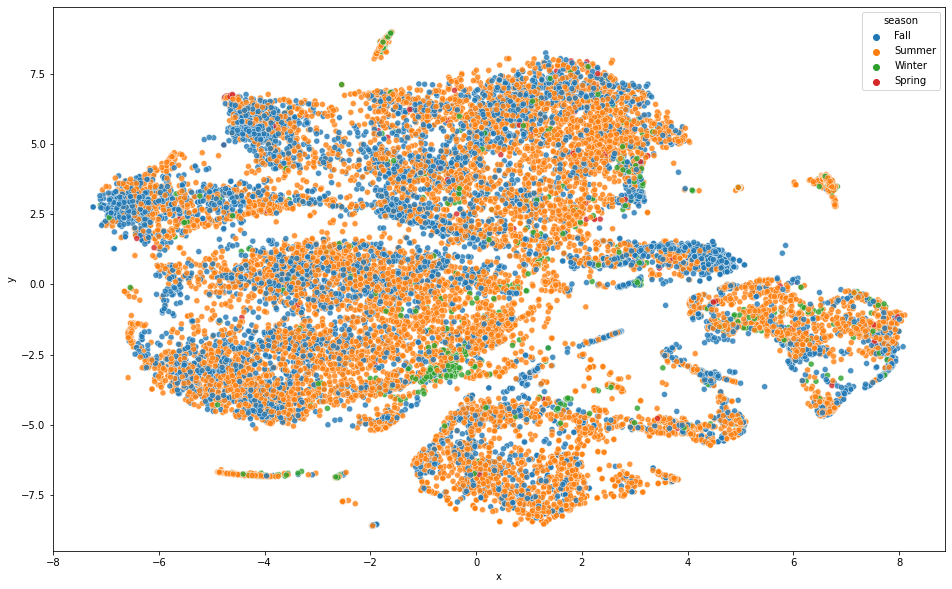

In [12]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    data=df_filtered,
    x="x", y="y",
    hue="season",
    legend="full",
    alpha=0.8
)
plt.savefig("tsne-2d-apparel-season")